In [25]:
import tensorflow as tf
import numpy as np
import cv2 as cv
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import itertools

In [ ]:
input_fn = ''
out_fn = ''

In [ ]:
test_img = cv2.imread(input_fn)

In [7]:
def csv_reading(f_name):
    with open(f_name, 'r') as data:
        temp = pd.read_csv(data)
    temp = temp.values.tolist()
    for i in range(len(temp)):
        temp[i][1] = temp[i][1].split(' ')
    images = [item[1] for item in temp]
    for i in range(len(images)):
        images[i] = np.asarray([int(x) for x in images[i]])
        images[i] = images[i].reshape([48, 48, 1])
    labels = [item[0] for item in temp]
    return np.asarray(images), labels

In [8]:
images, labels = csv_reading('fer2013.csv')

In [11]:
test_labels = labels[32298:]
test_img = images[32298:]
predict_labels = []

In [14]:
with tf.Session(graph=tf.Graph()) as sess1:
    tf.saved_model.loader.load(
        sess1,
        [tf.saved_model.tag_constants.SERVING],
        "DeepCNN_Softmax"
    )

    prediction = sess1.run(
        'Softmax:0',
        feed_dict={
            'Placeholder:0': test_img
        }
    )
    result = np.argmax(prediction, axis=1)
    print(np.argmax(prediction, axis=1))
    

INFO:tensorflow:Restoring parameters from b'DeepCNN_Softmax/variables/variables'
[4 4 4 ... 6 3 4]


In [28]:
target_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [29]:
print(classification_report(test_labels, result, target_names=target_names))

             precision    recall  f1-score   support

      Angry       0.52      0.46      0.49       491
    Disgust       0.49      0.42      0.45        55
       Fear       0.46      0.24      0.32       528
      Happy       0.76      0.84      0.80       879
        Sad       0.40      0.55      0.46       594
   Surprise       0.72      0.71      0.72       416
    Neutral       0.55      0.55      0.55       626

avg / total       0.58      0.58      0.57      3589



In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.46232179 0.01629328 0.05906314 0.08553971 0.25661914 0.02240326
  0.09775967]
 [0.27272727 0.41818182 0.05454545 0.07272727 0.14545455 0.01818182
  0.01818182]
 [0.14393939 0.01325758 0.24431818 0.07765152 0.28787879 0.12121212
  0.11174242]
 [0.02161547 0.         0.01478953 0.8407281  0.06029579 0.01365188
  0.04891923]
 [0.07239057 0.01178451 0.07575758 0.08585859 0.54713805 0.02020202
  0.18686869]
 [0.03365385 0.00240385 0.07932692 0.07932692 0.03846154 0.71394231
  0.05288462]
 [0.06230032 0.00159744 0.04472843 0.09265176 0.22523962 0.02555911
  0.54792332]]


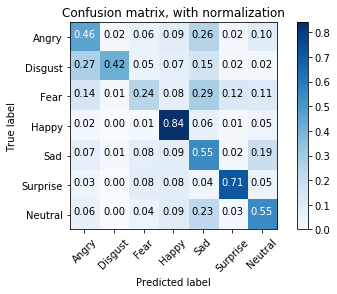

In [33]:
plt.figure()
plot_confusion_matrix(confusion_matrix(test_labels, result), classes=target_names,
                      title='Confusion matrix, with normalization', normalize=True)
plt.show()

In [ ]:
with tf.Session(graph=tf.Graph()) as sess2:
    tf.saved_model.loader.load(
        sess2,
        [tf.saved_model.tag_constants.SERVING],
        "DeepCNN_Loss_Accuracy"
    )

    loss1, accuracy1 = sess.run(
        ['Mean:0','Mean_1:0'],
        feed_dict={
            'Placeholder:0': test_img,
            'Placeholder_1:0': test_labels})
    

    print(loss1, accuracy1)

In [32]:
# np.savez('fer2013_data_set.npz', images = images, labels = labels)